<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مبانی بینایی 3 بعدی (پاییز 1402)
        </font>
		<p></p>
        <h1 style="text-align: center">
        تمرین اول - بخش عملی
        </h1>
		<h2 style="text-align: center">
        نام و نام خانوادگی: پرهام رضایی
		<br>
		شماره دانشجویی: 400108547
		<br>
		</h2>
		</h3>
            
  

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 1
        </font>
		<p></p>
		<hr>
       الف- ماتریس زیر را در نظر بگیرید، با استفاده از کتابخانه‌های موجود یک 2D DFT بر روی آن اعمال کنید و به فضای فرکانس ببرید و نتیجه را چاپ نمایید.
	   <br>
	</font>
</div>

In [1]:
import numpy as np

matrix = np.array([[3,4,-3,1,2],
              [6,5,-4,8,-6],
              [-7,1,5,7,9],
              [-9,-2,5,6,3],
              [9,6,8,-2,5]])

dft_matrix = np.fft.fft2(matrix)
magnitude_matrix = np.fft.fftshift(np.fft.fft2(matrix))
magnitude_matrix = 20*np.log(np.abs(dft_matrix))


print("Original Matrix:\n", matrix)
print("\nDiscrete Fourier Transform:\n", dft_matrix)


Original Matrix:
 [[ 3  4 -3  1  2]
 [ 6  5 -4  8 -6]
 [-7  1  5  7  9]
 [-9 -2  5  6  3]
 [ 9  6  8 -2  5]]

Discrete Fourier Transform:
 [[ 60.         +0.j         -14.73606798 +4.33901075j
  -10.26393202 -9.1472939j  -10.26393202 +9.1472939j
  -14.73606798 -4.33901075j]
 [  3.2532889  +9.11453775j  40.08610463-11.63719218j
  -10.        -14.49036173j  40.02379874 +8.75126649j
   29.53444185+16.6497449j ]
 [-15.7532889 +21.40502748j -12.52379874+19.86618572j
  -32.58610463 -4.56352474j   0.46555815-12.05346401j
  -10.         -6.3268805j ]
 [-15.7532889 -21.40502748j -10.         +6.3268805j
    0.46555815+12.05346401j -32.58610463 +4.56352474j
  -12.52379874-19.86618572j]
 [  3.2532889  -9.11453775j  29.53444185-16.6497449j
   40.02379874 -8.75126649j -10.        +14.49036173j
   40.08610463+11.63719218j]]


In [2]:
print("\nMagnitude of Discrete Fourier Transform:\n", magnitude_matrix)


Magnitude of Discrete Fourier Transform:
 [[81.88689124 54.63741605 52.41859634 52.41859634 54.63741605]
 [45.39657186 74.62972853 57.364774   74.25649341 70.47079961]
 [65.60098567 63.12661548 69.87194703 49.80194912 49.41852521]
 [65.60098567 49.41852521 49.80194912 69.87194703 63.12661548]
 [45.39657186 70.47079961 74.25649341 57.364774   74.62972853]]


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
       ب- بدون استفاده از کتابخانه‌های آماده خودتان تابع تبدیل فوریه را بنویسید و تصویر 1.jpg را به فضای فوریه ببرید و نتیجه را چاپ کنید.
</font>
</div>

In [3]:
# normal 2d DFT (so slow O(n^4))
def dft2d(matrix):
    N = matrix.shape[0]
    M = matrix.shape[1]
    dft_matrix = np.zeros((N,M), dtype=complex)
    for u in range(N):
        for v in range(M):
            for x in range(N):
                for y in range(M):
                    dft_matrix[u,v] += matrix[x,y]*np.exp(-1j*2*np.pi*(u*x/N+v*y/M))
    return dft_matrix


In [4]:
# cooleyTukey is a fast fourier transform algorithm for 1D array (O(nlgn))
# I'll use two of it to implement 2D Fast Fourier Transform
def cooleyTukey(array):
    N = array.shape[0]
    if N <= 1:
        return array
    even = cooleyTukey(array[0::2])
    odd = cooleyTukey(array[1::2])
    Res = np.zeros(N, dtype=complex)
    for k in range(N//2):
        Res[k] = even[k] + np.exp(-1j*2*np.pi*k/N)*odd[k]
        Res[k+N//2] = even[k] - np.exp(-1j*2*np.pi*k/N)*odd[k]
    return Res


In [5]:
# circular shifting for the frequency plot [getting the center of the plot]
def circular_shift(mat):
    m,n = mat.shape
    ms = (m+1)//2
    ns = (n+1)//2
    return np.roll(mat,(-ms,-ns),axis=(0,1))

In [6]:
# As my method needs the length of the array to be a power of 2, I need to pad the image
def pad_img(img):
    N = img.shape[0]
    M = img.shape[1]
    N_new = 2**int(np.ceil(np.log2(N)))
    M_new = 2**int(np.ceil(np.log2(M)))
    img_new = np.zeros((N_new, M_new))
    img_new[:N, :M] = img
    return img_new

In [7]:
# Here is my 2d fft implementation
def FFT2D(img):
    a = pad_img(img)
    a = np.apply_along_axis(cooleyTukey, 1, a)
    a = np.apply_along_axis(cooleyTukey, 0, a)
    return a

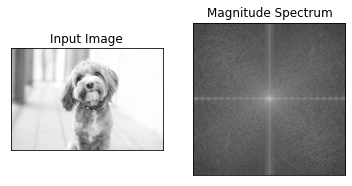

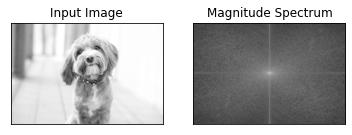

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("1.jpg", 0)

# my function (I had to pad it to make it work)
magnitude_spectrum = circular_shift(FFT2D(img))
magnitude_spectrum = 20*np.log(np.abs(magnitude_spectrum))
plt.figure(facecolor="white")
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Using the built-in functions
fft_img = np.fft.fft2(img)
magnitude_spectrum = np.fft.fftshift(fft_img)
magnitude_spectrum = 20*np.log(np.abs(magnitude_spectrum))

plt.figure(facecolor="white")
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 2
        </font>
		<p></p>
		<hr>
       فیلترهای فضایی Smooth کردن تصویر شامل Gaussian Blur, Average Pooling و Low pass filter را خودتان پیاده سازی کرده و بر روی تصویر 2.png اعمال کنید.
	   <br>
	</font>
</div>

In [9]:
def gaussian_blur(img):
    M,N = img.shape
    H = np.zeros((M+2,N+2))
    blurred = np.zeros((M,N))
    H[1:M+1,1:N+1] = img
    for u in range(M):
        for v in range(N):
            a = H[u:u+3,v:v+3]
            kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
            blurred[u,v] = np.sum(a*kernel)
    return blurred

def lowpassfilter(img):
    M,N = img.shape
    dft_matrix = np.fft.fft2(img)
    for u in range(M):
        for v in range(N):
            if u > M//2:
                u = u - M
            if v > N//2:
                v = v - N
            if np.sqrt(u**2+v**2) > 50:
                dft_matrix[u,v] = 0
    img = np.fft.ifft2(dft_matrix)
    img = np.abs(img)
    return img

def average_pool(img,ps):
    M,N = img.shape
    M = M//ps
    N = N//ps
    img = img[:ps*M,:ps*N]
    img = img.reshape((M,ps,N,ps))
    img = img.mean(axis=(1,3))
    return img

Own functions


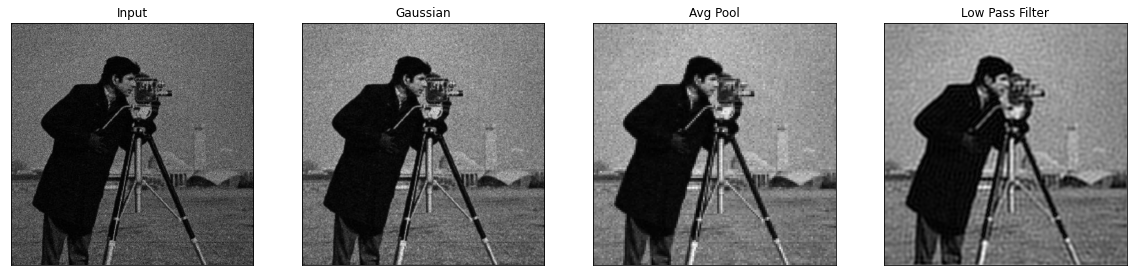

Built-in Functions


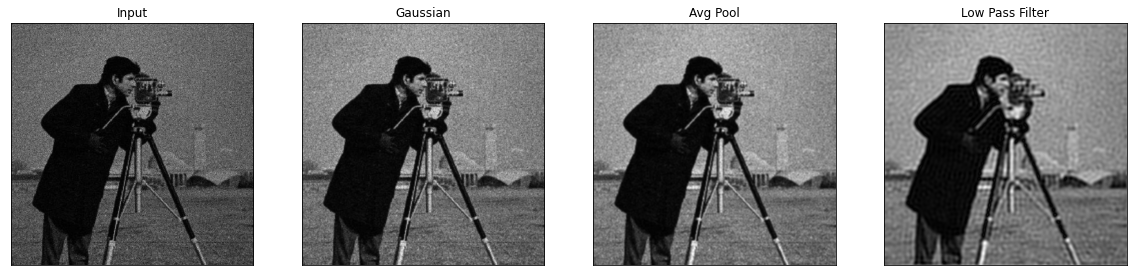

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('2.png', cv2.IMREAD_GRAYSCALE)

# using my own functions
avg_pool_img = average_pool(img,4)
filtered_image = lowpassfilter(img)
gaussian_img = gaussian_blur(img)

# using built-in functions
average_pool_builtin = cv2.blur(img,(4,4))
gaussian_img_builtin = cv2.GaussianBlur(img,(3,3),0)

print("Own functions")

plt.figure(figsize=(20, 5),facecolor="white")

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(avg_pool_img, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

print("Built-in Functions")
plt.figure(figsize=(20, 5),facecolor="white")

plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Input'), plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(gaussian_img_builtin, cmap = 'gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(average_pool_builtin, cmap = 'gray')
plt.title('Avg Pool'), plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(filtered_image, cmap='gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()



<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 3
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و تبدیل‌های HSV و YCbCr را بر روی تصاویر اعمال کرده و در خروجی نشان دهید.
	   <br>
	</font>
</div>

In [25]:
def hsv(img):
    img = img.astype(np.float32)
    img /= 255.0
    cmax = np.max(img, axis=2)
    amax = np.argmax(img, axis=2)
    cmin = np.min(img, axis=2)
    delta = cmax - cmin
    hsvm = np.zeros_like(img)
    hsvm[:,:,2] = cmax
    hsvm[:,:,1] = delta / cmax
    hsvm[cmax==0,1] = 0
    hsvm[amax==2,0] = (60*(img[amax==2,0]-img[amax==2,1])/(delta[amax==2]+1e-9) + 240)%360
    hsvm[amax==1,0] = (60*(img[amax==1,2]-img[amax==1,0])/(delta[amax==1]+1e-9) + 120)%360
    hsvm[amax==0,0] = (60*(img[amax==0,1]-img[amax==0,2])/(delta[amax==0]+1e-9) + 360)%360
    hsvm[cmax==cmin,0] = 0
    hsvm[:,:,0] /= 2
    hsvm[:,:,2] *= 255
    hsvm[:,:,1] *= 256

    return np.round(hsvm,0).astype(np.uint8)

def rgb2ycrcb(img):
    coeffs = np.array([[.299, .587, .114], [.5, -.4187, -.0813], [-.1687, -.3313, .5]])
    ycbcr = img.dot(coeffs.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

Own functions:


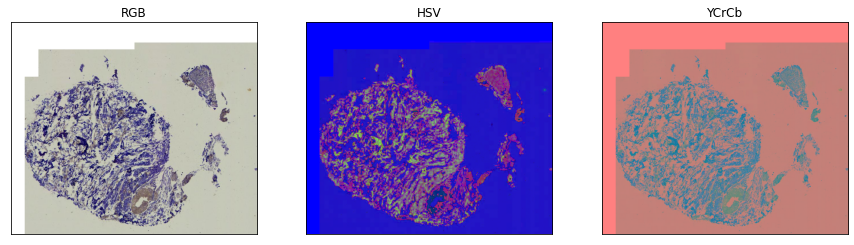

Built-in Functions:


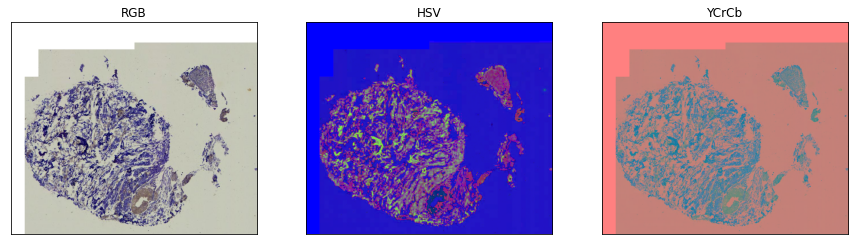

In [26]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# TODO
hsv_img = np.round(hsv(img),0).astype(np.uint8)
ycbcr_img = rgb2ycrcb(img)

print("Own functions:")
plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img,cmap='gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCrCb'), plt.xticks([]), plt.yticks([])
plt.show()

print("Built-in Functions:")
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
ycbcr_img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img,cmap='gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCrCb'), plt.xticks([]), plt.yticks([])
plt.show()



<font color='red' size=8>Disclaimer:</font>
</br>
In the question, it is mentioned that the format is YCbCr, but the sample answer in the notebook was indeed YCrCb. Therefore, I changed the name of the figure and also implemented the YCrCb conversion.
</br>
In the following cell you can see the true YCrCb answer:

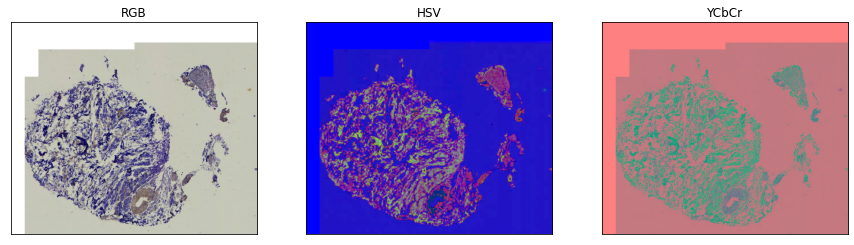

In [27]:
def rgb2ycbcr(img):
    coeffs = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = img.dot(coeffs.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

hsv_img = np.round(hsv(img),0).astype(np.uint8)
ycbcr_img = rgb2ycbcr(img)

plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('RGB'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(hsv_img,cmap='gray')
plt.title('HSV'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(ycbcr_img, cmap = 'gray')
plt.title('YCbCr'), plt.xticks([]), plt.yticks([])
plt.show()

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
	سوال 4
        </font>
		<p></p>
		<hr>
       تصویر 3.jpg را از ورودی گرفته و پس از حذف نویزهای نمک و فلفلی از روی تصویر، بک‌گراند تصویر را حذف کنید. (دقت کنید که بک‌گراند شامل بخش‌های سفیدرنگ و بخش‌های کرمی‌رنگ می‌باشد.)
	   <br>
	</font>
</div>

In [1]:
#my own median filter
def median_filter(img,ps):
    M,N,_ = img.shape
    M = M//ps
    N = N//ps
    r = img[:ps*M,:ps*N,0]
    g = img[:ps*M,:ps*N,1]
    b = img[:ps*M,:ps*N,2]
    r = r.reshape((M,ps,N,ps))
    r = np.median(r,axis=(1,3))
    g = g.reshape((M,ps,N,ps))
    g = np.median(g,axis=(1,3))
    b = b.reshape((M,ps,N,ps))
    b = np.median(b,axis=(1,3))
    img = np.zeros((M,N,3))
    img[:,:,0] = r
    img[:,:,1] = g
    img[:,:,2] = b
    return img

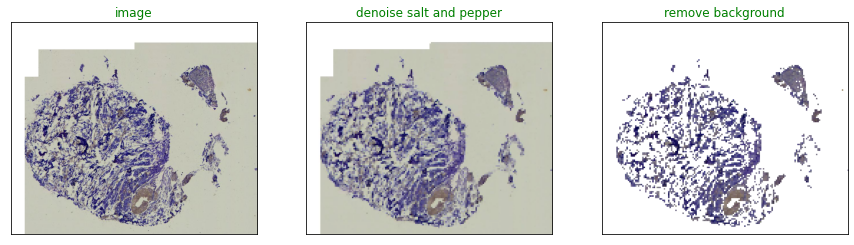

Here is the one using built-in functions(better)


/Users/cyberrose/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


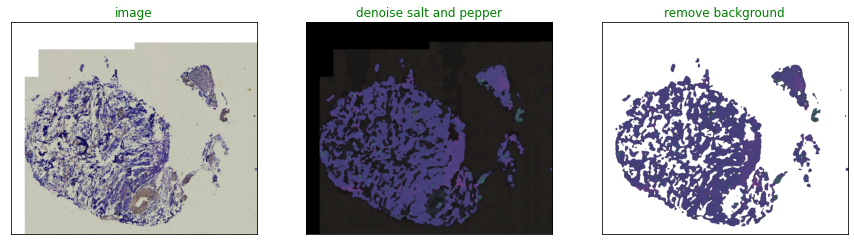

* the black background is because filter was done in hsv instead of rgb


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

img = cv2.imread('3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# convert to hsv
nsp = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
nsp = median_filter(nsp,5).astype(np.uint8)
nsp = cv2.cvtColor(nsp, cv2.COLOR_HSV2RGB)
denoised = nsp.copy()
# make img elements zero if the average of the three dimensions is more than 200
nsp[nsp.mean(axis=2)>140] = 255

plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('image',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(denoised)
plt.title('denoise salt and pepper',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(nsp)
plt.title('remove background',color='green'), plt.xticks([]), plt.yticks([])
plt.show()

print("Here is the one using built-in functions(better)")
from scipy import ndimage
hsv_img_builtin = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
denoised = ndimage.median_filter(hsv_img_builtin, size=8)
denoised = cv2.cvtColor(denoised, cv2.COLOR_HSV2RGB)
nsp = denoised.copy()
nsp[nsp.mean(axis=2)<50] = 255

plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('image',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(denoised)
plt.title('denoise salt and pepper',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(nsp)
plt.title('remove background',color='green'), plt.xticks([]), plt.yticks([])
plt.show()
print("* the black background is because filter was done in hsv instead of rgb")


Here I make the removed pixels black instead of white:

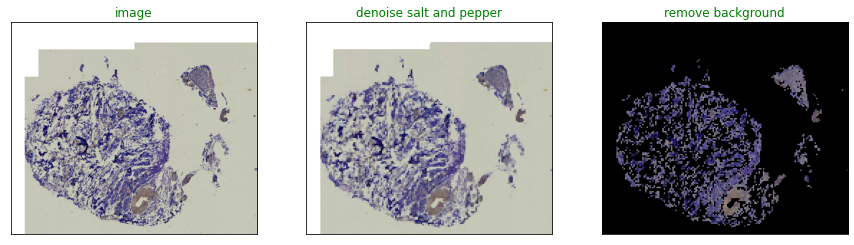

Here is the one using built-in functions(better)


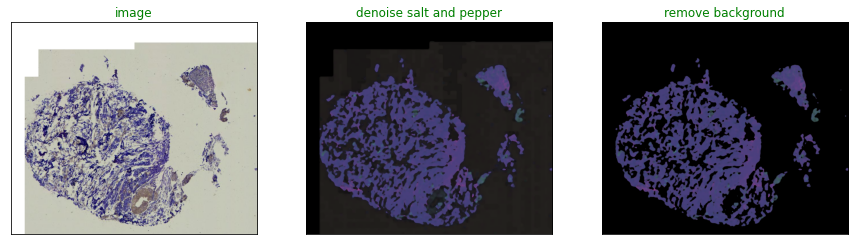

* the black background is because filter was done in hsv instead of rgb


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

img = cv2.imread('3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# convert to hsv
nsp = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
nsp = median_filter(nsp,5).astype(np.uint8)
nsp = cv2.cvtColor(nsp, cv2.COLOR_HSV2RGB)
denoised = nsp.copy()
# make img elements zero if the average of the three dimensions is more than 200
nsp[nsp.mean(axis=2)>140] = 0

plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('image',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(denoised)
plt.title('denoise salt and pepper',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(nsp)
plt.title('remove background',color='green'), plt.xticks([]), plt.yticks([])
plt.show()

print("Here is the one using built-in functions(better)")
from scipy import ndimage
hsv_img_builtin = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
denoised = ndimage.median_filter(hsv_img_builtin, size=8)
denoised = cv2.cvtColor(denoised, cv2.COLOR_HSV2RGB)
nsp = denoised.copy()
nsp[nsp.mean(axis=2)<50] = 0

plt.figure(figsize=(15, 5),facecolor="white")

plt.subplot(131),plt.imshow(img)
plt.title('image',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(denoised)
plt.title('denoise salt and pepper',color='green'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(nsp)
plt.title('remove background',color='green'), plt.xticks([]), plt.yticks([])
plt.show()
print("* the black background is because filter was done in hsv instead of rgb")
